# Datashader for AirBnB

`Datashader` has been popping up in a few geographical visualisations around the web, claiming effortless scalability for millions and millions of datapoints (and there are examples out there that claim [over a billion datapoints](https://github.com/bokeh/datashader/blob/master/examples/osm-1billion.ipynb)). This could make it an interesting option when traditional Javascript-based methods are starting to look and feel clunky. 

Here, we are going to see how to render a basic visualization using a new dataset.

For extensions and improvements on this visualization, see the [Example library](https://github.com/bokeh/datashader/tree/master/examples).

In [77]:
%matplotlib inline

import datashader as ds
import datashader.transfer_functions as tf
from datashader.colors import viridis, inferno
from datashader.bokeh_ext import InteractiveImage
from bokeh.plotting import figure, output_notebook, show
import pandas as pd

## Data loading

Our first experiment will start off with a rather small dataset: AirBnB listings in Amsterdam. We won't (yet) make use of Datashader's out-of-core capabilities, but instead demonstrate the process on a minimal dataset.

The data can be found (HERE).

In [83]:
df = pd.read_csv("../data/listings.csv")

In [84]:
df.shape

(15181, 16)

There are 15181 rows in this dataset. That is definitely not a datasize we would normally feel compelled to use something like Datashader for, but it works well enough for tutorial purposes.

In [85]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

We see that there is some extra information here besides just the latitude and longitude of the listing. This might be interesting later, so let's have a quick look at these variables. However, for our first graph, we'll focus on using the latitude and longitude of the entire set.

In [86]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14831696,Luxurious & spacecious apartm. with garden 6sleep,5476119,Arthur,NaN,De Baarsjes - Oud-West,52.361173,4.866755,Entire home/apt,145,3,4,2016-12-31,0.68,1,241
1,3951251,Great app near Jordaan +2 bikes,3526186,Dirk & Arjenne,NaN,De Baarsjes - Oud-West,52.370237,4.859507,Entire home/apt,88,2,17,2017-02-23,0.56,1,47
2,16590973,"Trendy apartment, near Vondelpark",12749039,Sheryl,NaN,De Baarsjes - Oud-West,52.362016,4.866872,Entire home/apt,130,2,4,2017-03-26,2.40,1,129
3,9283701,Modern apartment in Amsterdam West,46755996,Christie,NaN,De Baarsjes - Oud-West,52.365826,4.858178,Entire home/apt,110,4,2,2016-08-09,0.24,2,0
4,6458721,(Balcony with) canal view Oud-West,15317293,Erwin,NaN,De Baarsjes - Oud-West,52.364179,4.864885,Entire home/apt,115,3,10,2016-12-11,0.46,1,3


Let's have a quick look on the completeness of our set in the different neighborhoods in Amsterdam.

In [82]:
df \
  .groupby("neighbourhood") \
  .count()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,,,,,,
Bijlmer-Centrum,79,79,79,79,0,79,79,79,79,79,79,61,61,79,79
Bijlmer-Oost,108,108,108,108,0,108,108,108,108,108,108,88,88,108,108
Bos en Lommer,765,765,765,764,0,765,765,765,765,765,765,668,668,765,765
Buitenveldert - Zuidas,186,186,186,186,0,186,186,186,186,186,186,153,153,186,186
Centrum-Oost,1389,1389,1389,1388,0,1389,1389,1389,1389,1389,1389,1211,1211,1389,1389
Centrum-West,1985,1985,1985,1985,0,1985,1985,1985,1985,1985,1985,1722,1722,1985,1985
De Aker - Nieuw Sloten,105,105,105,105,0,105,105,105,105,105,105,87,87,105,105
De Baarsjes - Oud-West,2672,2672,2672,2672,0,2672,2672,2672,2672,2672,2672,2315,2315,2672,2672
De Pijp - Rivierenbuurt,1812,1812,1812,1812,0,1812,1812,1812,1812,1812,1812,1565,1565,1812,1812


Later on, when making our graph, we'll have to specify our axis boundaries, etc. To make these a bit more interpretable, we'll convert our latitudes and longitudes into Web Mercator coordinates (meters East of Greenwich and meters North of the Equator).

For this, we'll use `datashader.utils.lnglat_to_meters()`

This is an entirely optional step, as one can obtain similar graphs using the original latitudes and longitudes.

In [103]:
df["long1"], df["lat1"] = ds.utils.lnglat_to_meters(df["longitude"], df["latitude"])
df[["long1", "longitude", "lat1", "latitude"]].head()

,long1,longitude,lat1,latitude
0,541764.641855,4.866755,6.865695e+06,52.361173
1,540957.808491,4.859507,6.867348e+06,52.370237
2,541777.763952,4.866872,6.865849e+06,52.362016
3,540809.898188,4.858178,6.866544e+06,52.365826
4,541556.504230,4.864885,6.866244e+06,52.364179


## Creating our first graph

In essence, creating our first simple Datashader visualization contains of three steps:

1. Initialize a canvas
1. Aggregate our data on to the canvas' pixels
1. Map our pixeldata to colours

We will do this by using `Canvas()`, `points()`, and `shade()` in this order.

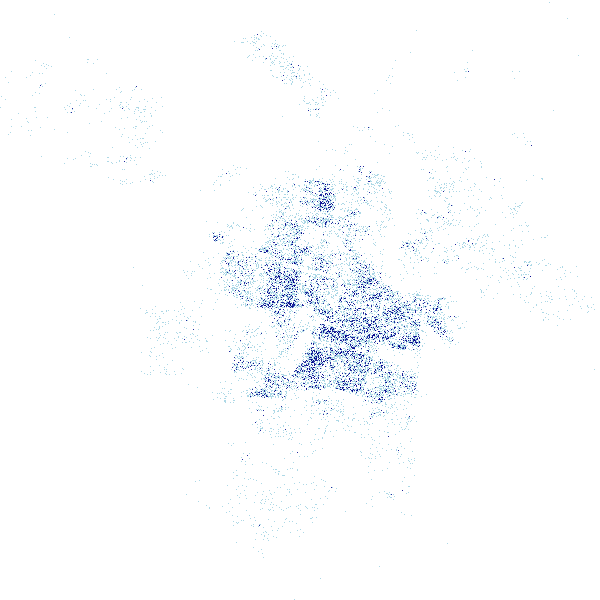

In [208]:
cvs = ds.Canvas()
agg = cvs.points(df, "lat1", "long1", ds.count())
img = tf.shade(agg)
img

While that does not look pretty yet, it is quite obviously Amsterdam (and we can spot some of the major parks and the water by the lack of listings in certain areas). Another thing to note was that all of these 15000+ listings rendered in a fraction of a second. Let's use some cell magic to figure out how fast these operations were:

In [212]:
%%timeit
cvs = ds.Canvas()
agg = cvs.points(df, "lat1", "long1", ds.count())
img = tf.shade(agg)

10 loops, best of 3: 33.6 ms per loop


As we can tell, even though this dataset is quite small, the rendering is blazingly fast. This is good to keep in mind once we start working with larger datasets as well. For now, let's focus on how we can make the visualization a bit more appealing to the eye.

## Refining our visualization

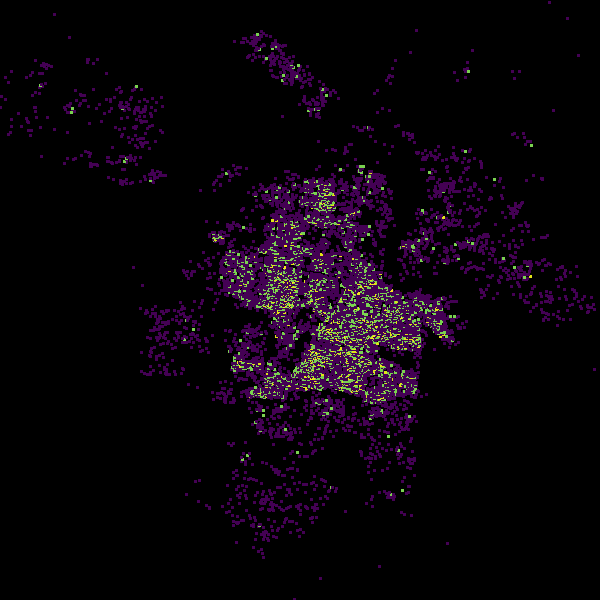

In [225]:
tf.set_background(tf.dynspread(tf.shade(agg, cmap=viridis)),"black")

In [122]:
print("Min values:\n", df[["long1", "lat1"]].min())
print("Max values:\n", df[["long1", "lat1"]].max())

Min values:
 long1    5.291586e+05
lat1     6.852788e+06
dtype: float64
Max values:
 long1    5.596798e+05
lat1     6.877562e+06
dtype: float64


In [248]:
x_range = [6850000, 6900000]
y_range = [525000, 560000]

ratio = ((max(x_range) - min(x_range)) / (max(y_range) - min(y_range)))
plot_height = 750
plot_width = int(plot_height * ratio)

cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range = y_range)
#cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
#agg = cvs.points(df, 'pickup_longitude', 'pickup_latitude', ds.count('total_amount'))
#img = tf.shade(agg, cmap=viridis, how='eq_hist')
#return tf.dynspread(img, threshold=0.5, max_px=4)

In [249]:
%%time
agg = cvs.points(df, 'lat1', 'long1', ds.count())

Wall time: 5 ms


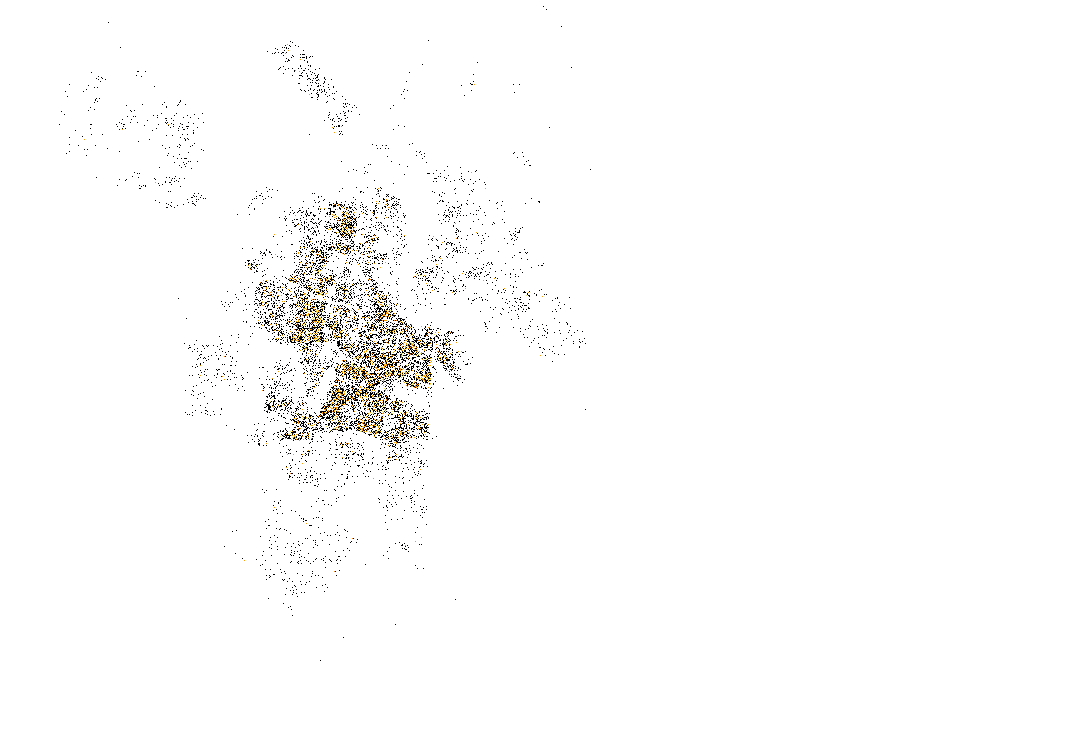

In [250]:
#%%time
img = tf.shade(agg, cmap=inferno, how='eq_hist')
img

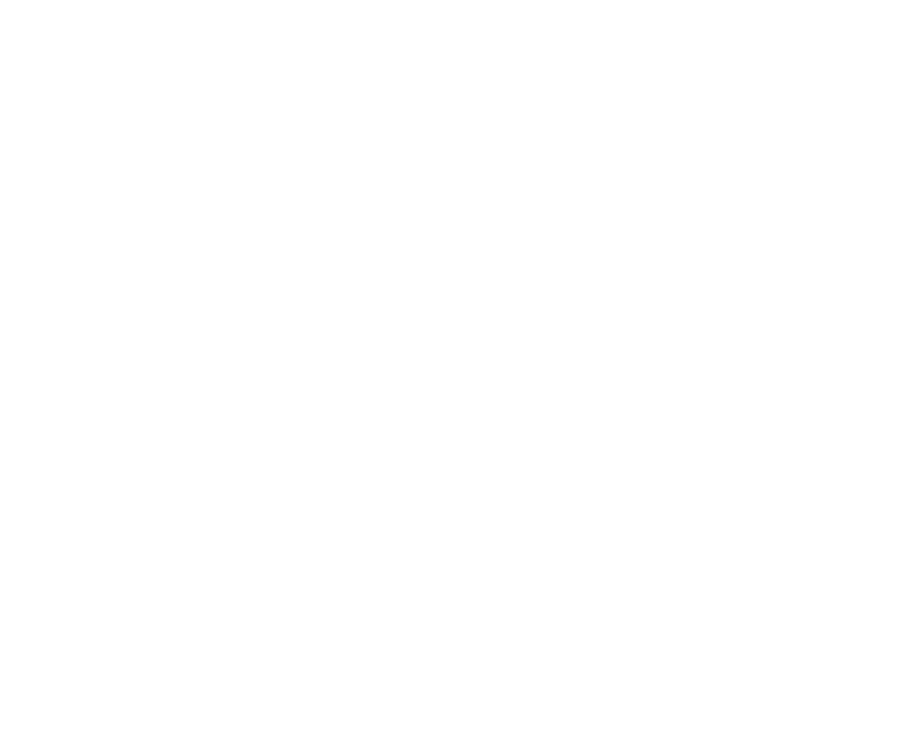

In [130]:
tf.dynspread(img, threshold=0.5, max_px=4)

Let's first choose a background color for our results. A black background makes bright colors more vivid, and works well when later adding relatively dark satellite image backgrounds, but white backgrounds (background=None) are good for examining the weakest patterns, and work well when overlaying on maps that use light colors. In projects, try it both ways, and see what is more useful and compatible with the rest of your visualizations.

In [24]:
background = "black"
#background = None

In [219]:
output_notebook(hide_banner=True)

plot_width = 1071
plot_height = 750

bounds = dict(x_range = x_range, y_range = y_range)

p = figure(tools='pan,wheel_zoom,box_zoom,reset', background_fill_color="black",
           plot_width=plot_width, plot_height=plot_height, **bounds)

def create_image(x_range, y_range, w, h):
    cvs = ds.Canvas(x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'lat1', 'long1', ds.count())
    return tf.dynspread(tf.shade(agg, cmap=["darkblue", "lightcyan"]))

InteractiveImage(p, create_image)

## Appendix

* [If Taxi Trips were Fireflies: 1.3 Billion NYC Taxi Trips Plotted](https://medium.com/towards-data-science/if-taxi-trips-were-fireflies-1-3-billion-nyc-taxi-trips-plotted-b34e89f96cfa)([Notebook](https://github.com/r-shekhar/NYC-transport/blob/master/15_dataframe_analysis/Datashader_maps_01.ipynb))